In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from seaborn import get_dataset_names
get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [31]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_diabetes

In [32]:
iris=load_iris()

In [33]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
y = pd.DataFrame(data = iris.target, columns = ['y'])
y.replace([0, 1, 2], iris.target_names, inplace = True)

In [35]:
df = pd.merge(X, y, left_index = True, right_index = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
y                    0
dtype: int64

In [37]:
df.duplicated().sum()

1

In [38]:
df = df.drop_duplicates()

In [39]:
#!pip install -U pandas-profiling

<ipython-input-40-2c59381c9e2a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


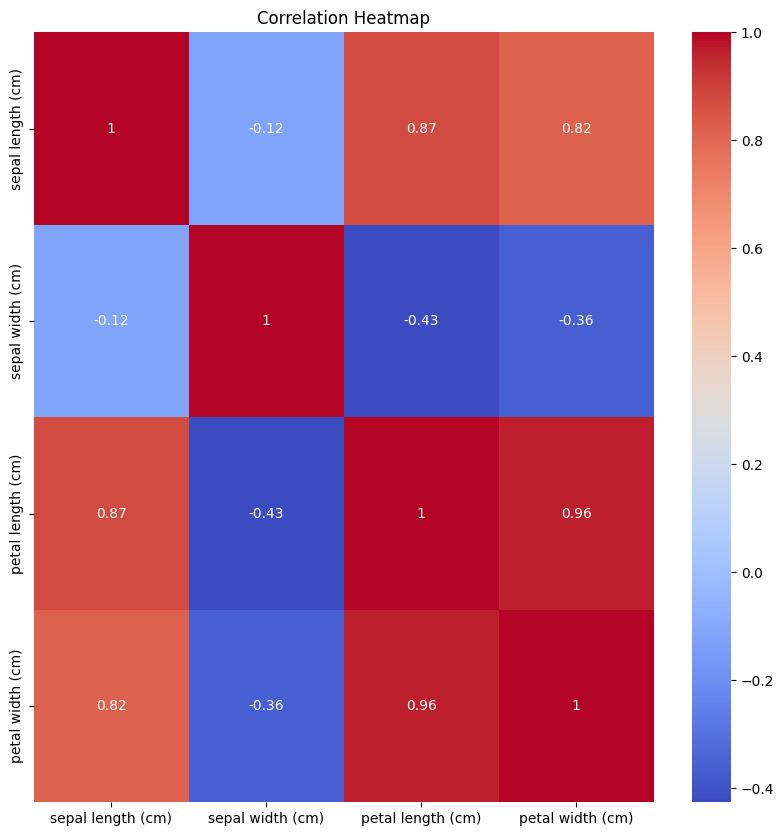

In [40]:
plt.figure(figsize = (10, 10))
correlation_matrix = df.corr()
# annot_kws : 글씨 크기
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

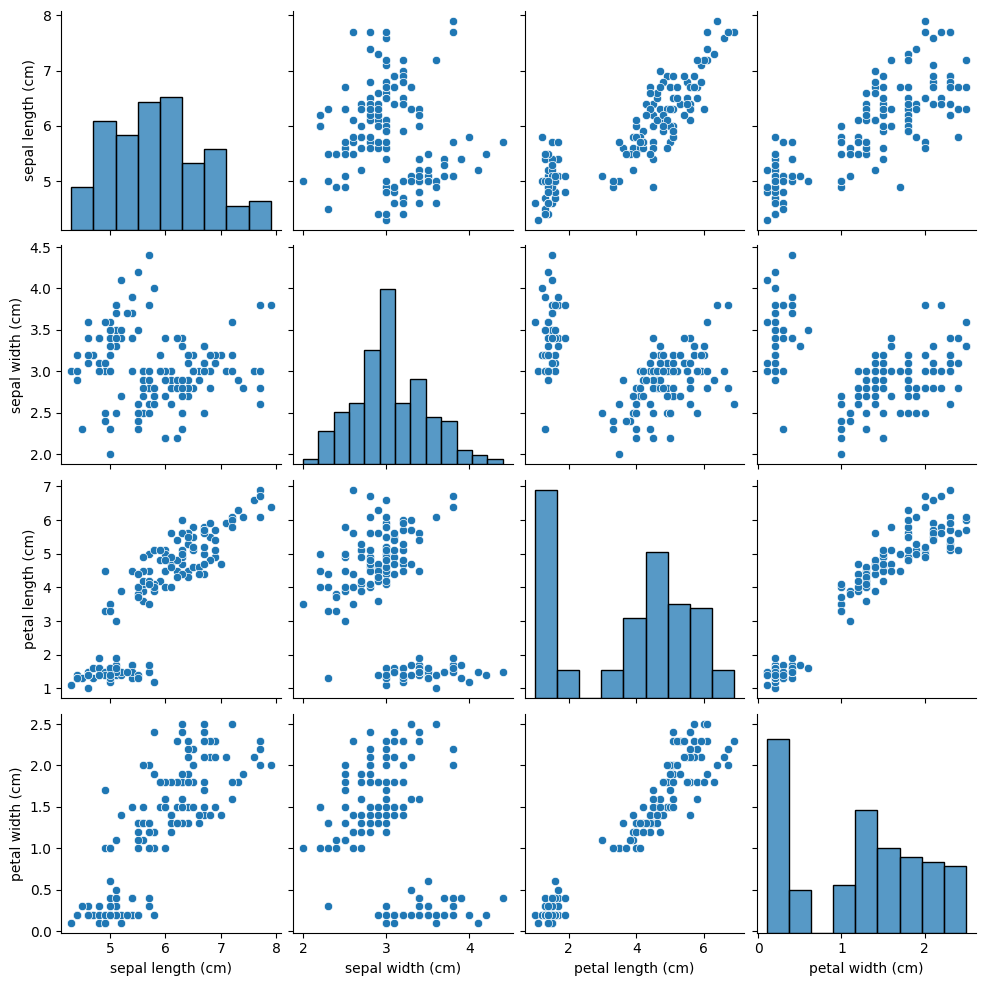

In [41]:
sns.pairplot(df)

In [42]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'y'],
      dtype='object')

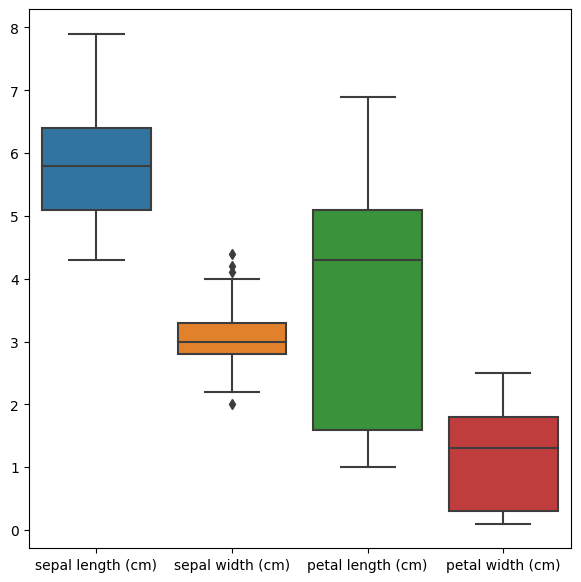

In [43]:
#sns.boxplot(data = df, x = "sepal length (cm)", y = "y")
plt.figure(figsize = (7, 7))
sns.boxplot(data = df)
plt.show()

In [44]:
# sepal width (cm) 가장 큰 값 3개 제거
df.drop(df.nlargest(3, 'sepal width (cm)').index, axis = 0, inplace = True)

<ipython-input-44-81c5c4188b6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.nlargest(3, 'sepal width (cm)').index, axis = 0, inplace = True)


In [45]:
len(df)

146

In [46]:
# sepal width (cm) 가장 작은 값 3개 제거
df.drop(df.nsmallest(1, 'sepal width (cm)').index, axis = 0, inplace = True)

<ipython-input-46-9f4d578b0c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.nsmallest(1, 'sepal width (cm)').index, axis = 0, inplace = True)


In [47]:
len(df)

145

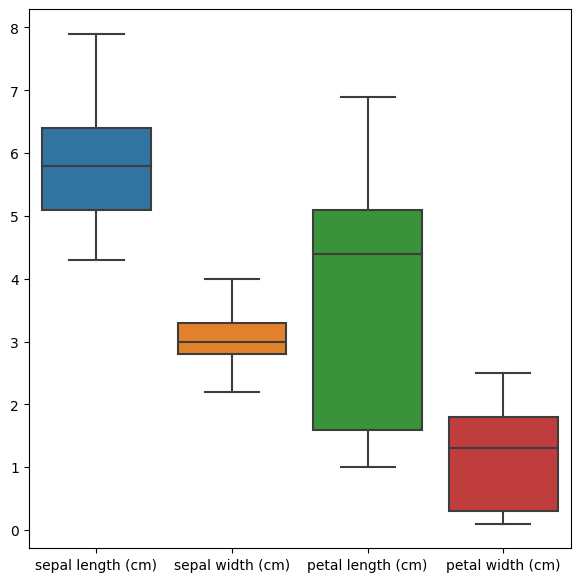

In [48]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   y                  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [50]:
X = df.drop("y", axis = 1)
y = df['y']

In [51]:
from sklearn.model_selection import train_test_split # 데이터셋 나누기
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 3, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((101, 4), (44, 4), (101,), (44,))

In [52]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [53]:
m1 = LogisticRegression()
m2 = SGDClassifier()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = SVC()
m6 = GaussianNB()

for i in [m1, m2, m3, m4, m5, m6]:
    print(i, cross_val_score(i, train_x, train_y).mean())

LogisticRegression() 0.9404761904761905
SGDClassifier() 0.7104761904761905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KNeighborsClassifier() 0.940952380952381
DecisionTreeClassifier() 0.9114285714285714
SVC() 0.9604761904761905
GaussianNB() 0.930952380952381


In [54]:
m4.fit(train_x,train_y)

DecisionTreeClassifier()

In [55]:
m4.score(train_x,train_y),m4.score(test_x,test_y)

(1.0, 0.9545454545454546)